<a href="https://colab.research.google.com/github/saharrsaber/kaggle-survey-visualization-EDA/blob/main/KaggleSurveyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries
* Pandas: storing the dataset
* Matplotlib: visualize the data
* Numpy: for statistical methods


In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import pandas.util.testing as tm

## Upload Dataset


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path = "/content/drive/MyDrive/Python Notebooks/Kaggle Survey/kaggle_survey_2020_responses.csv"
DATA = pd.read_csv(path, skiprows=1)
DATA.columns

Index(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'For how many years have you been writing code and/or programming?',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
       ...
       'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  W

Selected Cols

In [46]:
use_cols = ['What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'For how many years have you been writing code and/or programming?',
       'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice',
       'For how many years have you used machine learning methods?',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?'
       ]
col_names = ['gender', 'country', 'education', 'role', 'years_experience', 'recommend_language', 'years_ML', 'company_size','ds_size','company_ML']

df = pd.read_csv(path, skiprows=1, usecols= use_cols)
df.columns = col_names
df.head()

,gender,country,education,role,years_experience,recommend_language,years_ML,company_size,ds_size,company_ML
0,Man,Colombia,Doctoral degree,Student,5-10 years,Python,1-2 years,NaN,NaN,NaN
1,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod..."
2,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods)
3,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod..."
4,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN


In [47]:
df.describe()

,gender,country,education,role,years_experience,recommend_language,years_ML,company_size,ds_size,company_ML
count,20036,20036,19569,19277,19120,17821,16374,11403,11282,11130
unique,5,55,7,13,7,13,9,5,7,6
top,Man,India,Master’s degree,Student,3-5 years,Python,Under 1 year,0-49 employees,1-2,We are exploring ML methods (and may one day p...
freq,15789,5851,7859,5171,4546,14241,6312,4208,2645,2353


In [48]:
print(df['gender'].unique())
replace_gender = {
    'Prefer not to say': 'Others',
    'Prefer to self-describe': 'Others',
    'Nonbinary': 'Others', 
}
df['gender'].replace(replace_gender, inplace=True)
df['gender'].unique()

['Man' 'Woman' 'Prefer to self-describe' 'Prefer not to say' 'Nonbinary']


array(['Man', 'Woman', 'Others'], dtype=object)

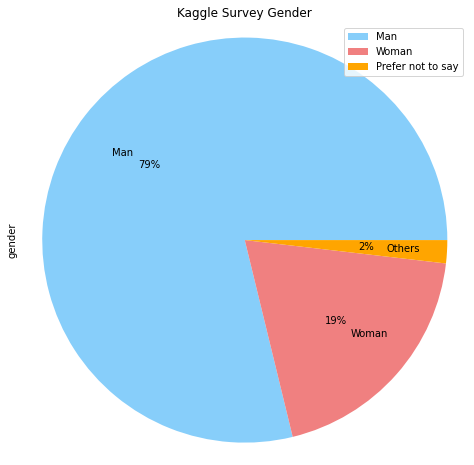

In [49]:
colors = ['lightskyblue', 'lightcoral', 'orange']
plt.figure()
df["gender"].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%',labeldistance = 0.7, colors = colors)
plt.gca().set_title('Kaggle Survey Gender')
plt.gca().legend(['Man', 'Woman','Prefer not to say', 'self-desc'])
plt.axis('equal')
plt.show()

In [50]:
print(df['education'].unique())
replace_edu = {
    'Bachelor’s degree': 'Bachelor',
    'Doctoral degree': 'Doctoral',
    'I prefer not to answer':'prefer not to say',
    'Master’s degree': 'Master’s',
    'No formal education past high school':'High School',
    'Professional degree':'Professional degree',
    'Some college/university study without earning a bachelor’s degree':'some uni'
}
df['education'].replace(replace_edu, inplace=True)
df['education'].unique()

['Doctoral degree' 'Master’s degree' 'Bachelor’s degree'
 'No formal education past high school'
 'Some college/university study without earning a bachelor’s degree'
 'Professional degree' 'I prefer not to answer' nan]


array(['Doctoral', 'Master’s', 'Bachelor', 'High School', 'some uni',
       'Professional degree', 'prefer not to say', nan], dtype=object)

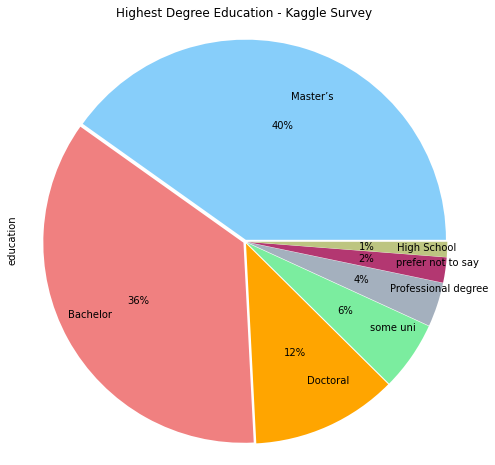

In [51]:
plt.figure()
colors = ['lightskyblue', 'lightcoral', 'orange', '#7bed9f', '#a4b0be','#B33771','#BDC581']
explode = [0.01]*7
df["education"].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%',labeldistance = 0.75, colors = colors, explode = explode)
plt.gca().set_title('Highest Degree Education - Kaggle Survey')
plt.axis('equal')
plt.show()

In [52]:
pd.crosstab(index=df["gender"], columns=df["education"])  

education,Bachelor,Doctoral,High School,Master’s,Professional degree,prefer not to say,some uni
gender,,,,,,,
Man,5596,1765,218,6125,563,281,898
Others,100,49,8,126,8,45,23
Woman,1282,488,14,1608,128,73,171


In [53]:
man = df[df['gender'] == 'Man']
woman = df[df['gender'] == 'Woman']


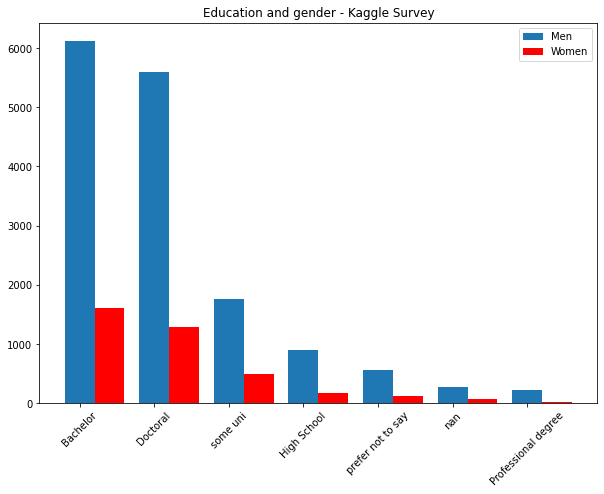

In [54]:
gridnumber = range(1,8)
gridnumber_2 = [i+0.4 for i in gridnumber ]
plt.figure(figsize=(10,7))
b1 = plt.bar(gridnumber, man['education'].value_counts(), width=0.4,
                label="Men", align="center")

b2 = plt.bar(gridnumber_2,  woman['education'].value_counts(), color="red", width=0.4,
                label="Women", align="center")
plt.gca().set_title('Education and gender - Kaggle Survey')
plt.legend()
plt.gca().set_xticklabels( woman['education'].unique(), rotation=45 )
plt.show()

<Figure size 432x288 with 0 Axes>

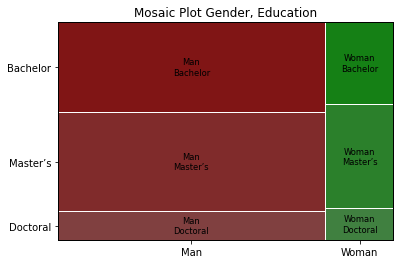

In [55]:
mosaic_df = df[df['gender'].isin(['Man', 'Woman']) ]
mosaic_df['gender'].unique()

mosaic_df = mosaic_df[mosaic_df['education'].isin(["Master’s", 'Doctoral','Bachelor']) ]
mosaic_df['education'].unique()

plt.figure()
mosaic(mosaic_df, ['gender', 'education'], title='Mosaic Plot Gender, Education')
plt.show()

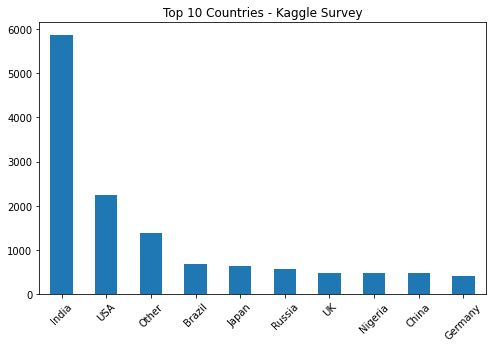

In [56]:
top_10_countries = df['country'].value_counts()[:10]
replace_countries = {'United Kingdom of Great Britain and Northern Ireland': 'UK',
                     'United States of America': 'USA'}
top_10_countries.rename(replace_countries, inplace=True)

plt.figure(figsize=(8,5))
pd.Series(top_10_countries).plot.bar( rot=45)
plt.gca().set_title('Top 10 Countries - Kaggle Survey')
plt.show()

In [57]:
df['recommend_language'].value_counts().head()

Python    14241
R          1259
SQL         849
C++         325
C           301
Name: recommend_language, dtype: int64

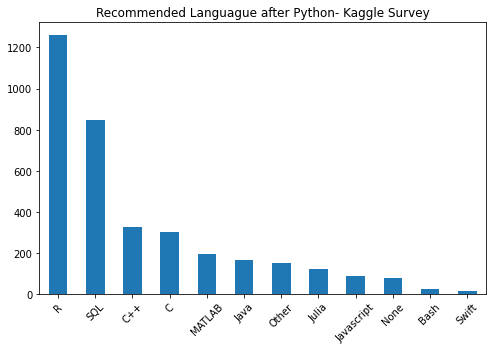

In [58]:
plt.figure(figsize=(8,5))
df['recommend_language'].value_counts()[1:13].plot.bar( rot=45)
plt.gca().set_title('Recommended Languague after Python- Kaggle Survey')
plt.show()

